# Data Exploration
The purpose of this notebook is to explore more in depth the _Spotify Tracks_ dataset and propose preprocessing techniques for each of the features present in the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

songs = pd.read_csv('data/spotify_data.csv', index_col=0)
print(f"There are {len(songs)} songs in the dataset")
print(f"The dataset has a total of {len(songs.columns)} features")
songs.head()

There are 114000 songs in the dataset
The dataset has a total of 20 features


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Cleaning the dataset

* Eliminate song duplicates
* Drop columns with missing data

In [2]:
songs = songs.drop_duplicates(['track_id'])
# Drop rows with missing values
songs.dropna(inplace=True)
print(f"There are {len(songs)} unique songs in the dataset")

There are 89740 unique songs in the dataset


## Exploring categorical features

In [3]:
categorical_features = songs[['explicit', 'key', 'mode', 'time_signature']]
categorical_features.head()

,explicit,key,mode,time_signature
0,False,1,0,4
1,False,1,1,4
2,False,0,1,4
3,False,0,1,3
4,False,2,1,4


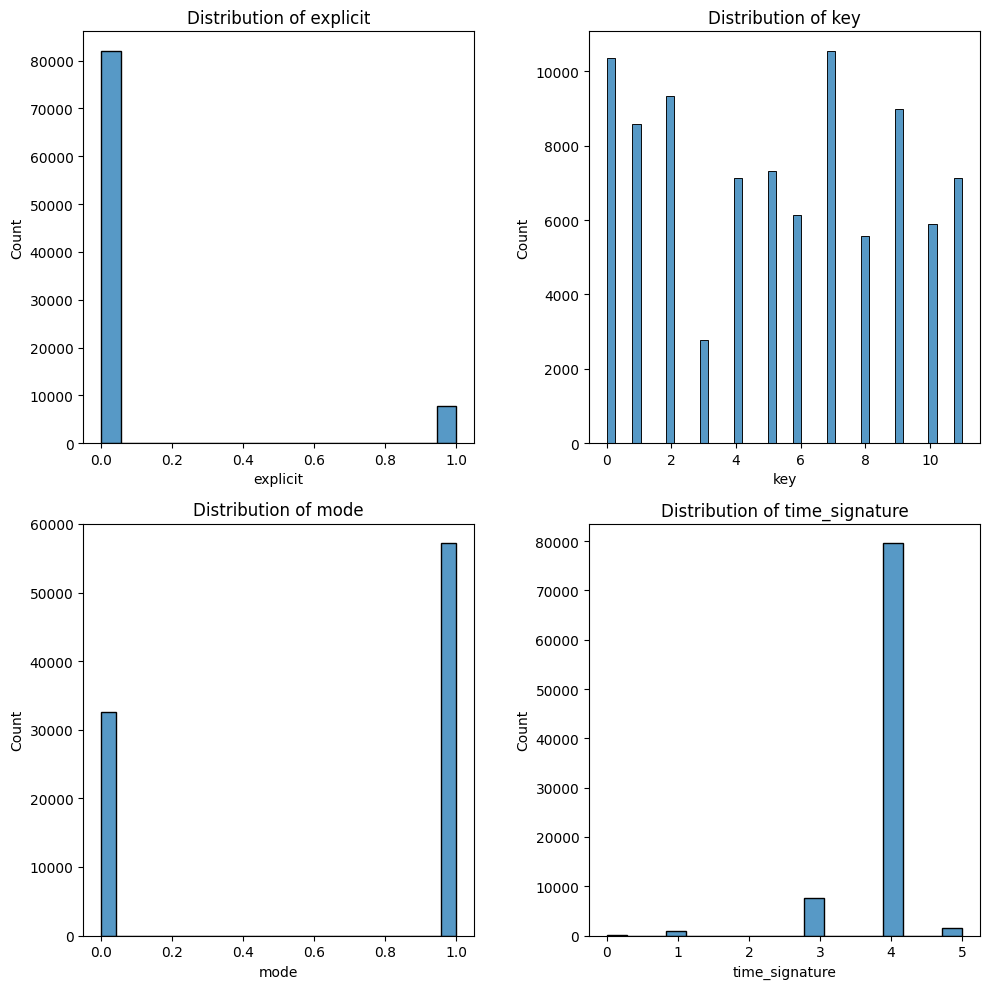

In [4]:
fig = plt.figure(figsize=(10, 10))
for i, feature in enumerate(categorical_features.columns, 1): 
    ax = plt.subplot(2, 2, i)
    sns.histplot(data=categorical_features, x=categorical_features[feature])
    ax.set_title(f'Distribution of {feature}')
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show()

## Exploring numerical features

In [5]:
numerical_features = songs.select_dtypes(include='number')
shared_features = set(categorical_features.columns).intersection(numerical_features.columns)
numerical_features.drop(shared_features, axis=1, inplace=True)
print(f"There are {len(numerical_features.columns)} numerical features")
numerical_features.describe()

There are 11 numerical features


,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,89740.000000,8.974000e+04,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000
mean,33.198808,2.291444e+05,0.562166,0.634458,-8.498994,0.087442,0.328285,0.173415,0.216971,0.469474,122.058134
std,20.580640,1.129458e+05,0.176692,0.256606,5.221518,0.113278,0.338321,0.323849,0.194885,0.262864,30.117651
min,0.000000,8.586000e+03,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.730400e+05,0.450000,0.457000,-10.322250,0.036000,0.017100,0.000000,0.098200,0.249000,99.262750
50%,33.000000,2.132955e+05,0.576000,0.676000,-7.185000,0.048900,0.188000,0.000058,0.132000,0.457000,122.013000
75%,49.000000,2.642930e+05,0.692000,0.853000,-5.108000,0.085900,0.625000,0.097625,0.279000,0.682000,140.077000
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


Converting duration to minutes so that it is easier to interpret

In [6]:
numerical_features['duration_ms'] = numerical_features['duration_ms'] / (1000 * 60)
numerical_features.rename(columns={'duration_ms': 'duration_min'}, inplace=True)
# Apply it also to the original dataset
songs['duration_ms'] = songs['duration_ms'] / (1000 * 60)
songs.rename(columns={'duration_ms': 'duration_min'}, inplace=True)
numerical_features.describe()

,popularity,duration_min,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000,89740.000000
mean,33.198808,3.819073,0.562166,0.634458,-8.498994,0.087442,0.328285,0.173415,0.216971,0.469474,122.058134
std,20.580640,1.882430,0.176692,0.256606,5.221518,0.113278,0.338321,0.323849,0.194885,0.262864,30.117651
min,0.000000,0.143100,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,2.884000,0.450000,0.457000,-10.322250,0.036000,0.017100,0.000000,0.098200,0.249000,99.262750
50%,33.000000,3.554925,0.576000,0.676000,-7.185000,0.048900,0.188000,0.000058,0.132000,0.457000,122.013000
75%,49.000000,4.404883,0.692000,0.853000,-5.108000,0.085900,0.625000,0.097625,0.279000,0.682000,140.077000
max,100.000000,87.288250,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


### Features we could consider normalising:
* duration_min
* loudness
* tempo
* popularity? (not sure about this one but since almost all numerical features are in a range between 0-1 it could make sense to normalize it)

### Finding outliers

* The tree algorithms and SVMs are robust to outliers but Naive Bayes and Logistic Regression might perform better if we deal with outliers

Some features that might have outliers:
* The average song duration is 3.85 min but there is a song in the dataset that lasts around 87 min
* Speechiness has a mean of 0.088 but the max speechiness is 0.965

We can find more outliers by visualizing the values of the features with a box plot

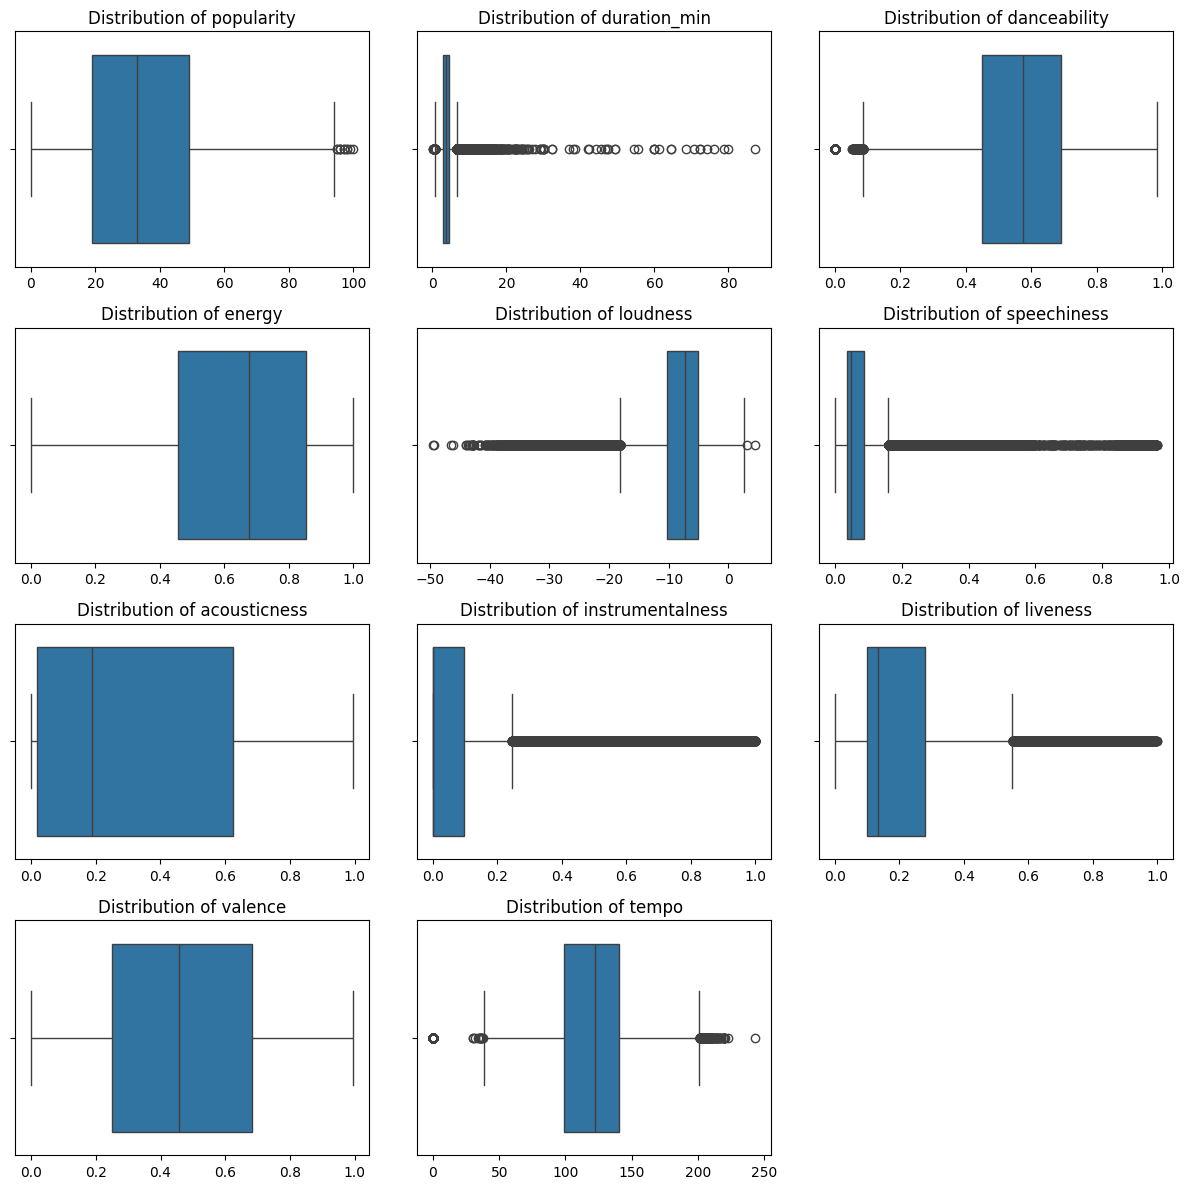

In [7]:
fig = plt.figure(figsize=(12, 12))
for i, feature in enumerate(numerical_features.columns, 1): 
    ax = plt.subplot(4, 3, i)
    sns.boxplot(data=numerical_features, x=numerical_features[feature])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {feature}')
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show()

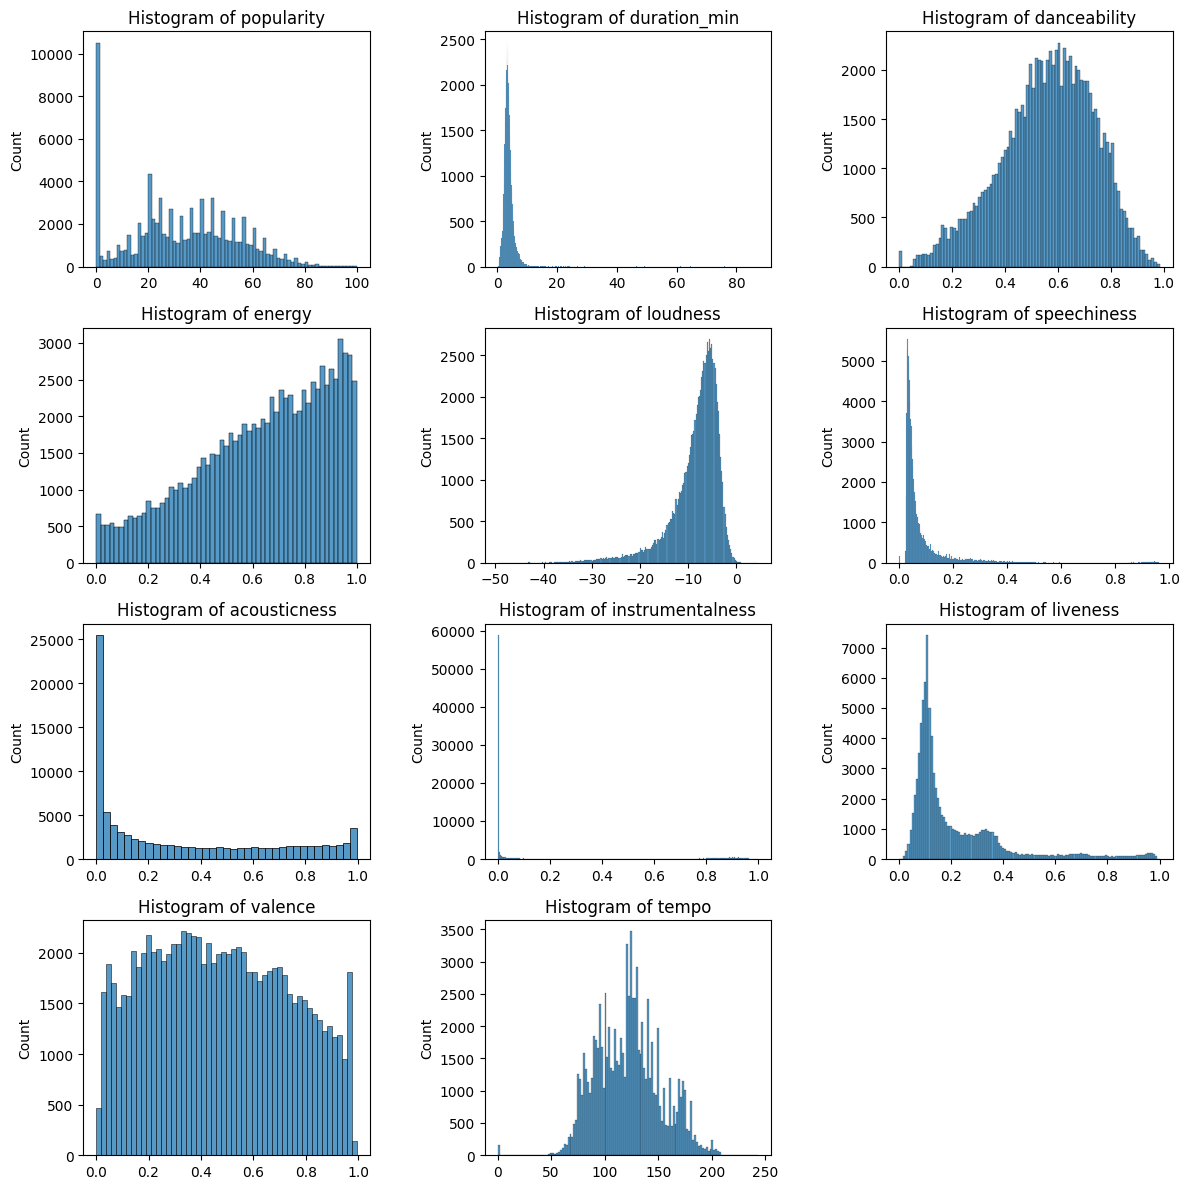

In [8]:
fig = plt.figure(figsize=(12, 12))
for i, feature in enumerate(numerical_features.columns, 1): 
    ax = plt.subplot(4, 3, i)
    sns.histplot(data=numerical_features, x=numerical_features[feature])
    ax.set_xlabel(None)
    ax.set_title(f'Histogram of {feature}')
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show()

From looking at the box plots, almost all features have outliers.

The only ones without outliers are: 
* Valence
* Acousticness
* Energy

### What to do with the outliers?

* We can discuss this together or ask the tutors :)

## Finding redundant variables

In [9]:
numerical_features.corr()

,popularity,duration_min,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,-0.023157,0.064275,0.013725,0.071674,-0.047086,-0.038828,-0.127477,-0.013857,-0.011508,0.007280
duration_min,-0.023157,1.000000,-0.064139,0.063258,0.000360,-0.060751,-0.108478,0.117372,0.008109,-0.147018,0.026004
danceability,0.064275,-0.064139,1.000000,0.143913,0.271838,0.109519,-0.177040,-0.194750,-0.132237,0.492578,-0.021329
energy,0.013725,0.063258,0.143913,1.000000,0.758774,0.141332,-0.732569,-0.181038,0.188940,0.256317,0.258629
loudness,0.071674,0.000360,0.271838,0.758774,1.000000,0.055295,-0.582664,-0.434719,0.077238,0.289095,0.228660
speechiness,-0.047086,-0.060751,0.109519,0.141332,0.055295,1.000000,0.005124,-0.099659,0.225100,0.032935,0.004033
acousticness,-0.038828,-0.108478,-0.177040,-0.732569,-0.582664,0.005124,1.000000,0.096072,-0.019073,-0.103781,-0.220252
instrumentalness,-0.127477,0.117372,-0.194750,-0.181038,-0.434719,-0.099659,0.096072,1.000000,-0.087157,-0.330756,-0.056885
liveness,-0.013857,0.008109,-0.132237,0.188940,0.077238,0.225100,-0.019073,-0.087157,1.000000,0.012322,-0.006113
valence,-0.011508,-0.147018,0.492578,0.256317,0.289095,0.032935,-0.103781,-0.330756,0.012322,1.000000,0.090617


### Highly correlated features

- loudness <-> energy (0.76)
- acousticness <-> energy (-0.73)
- loudness <-> acousticness (-0.58)
- valence <-> danceability (0.49)
- loudness <-> instrumentallness (-0.43)

## Exploring string features
* We could apply some preprocessing techniques we will learn on the _Text Mining_ lecture (this week 18.10)

In [10]:
string_features = songs[['artists', 'album_name', 'track_name']]
# This number is inaccurate because some tracks have lists of artists separated by ;
print(f"There are {len(songs['artists'].unique())} artists in the dataset")
print(f"There are {len(songs['album_name'].unique())} albums in the dataset")
string_features.head()

There are 31437 artists in the dataset
There are 46589 albums in the dataset


,artists,album_name,track_name
0,Gen Hoshino,Comedy,Comedy
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love
4,Chord Overstreet,Hold On,Hold On


## Exploring class distribution

* Check balance of the song genres

In [11]:
print(f"There are {len(songs['track_genre'].unique())} unique genres")
grouped_by_genre = songs.groupby(['track_genre']).size()
grouped_by_genre.describe()

There are 113 unique genres


count     113.000000
mean      794.159292
std       226.234493
min        74.000000
25%       709.000000
50%       873.000000
75%       974.000000
max      1000.000000
dtype: float64

### Class balance

* The classes are imbalanced (to be expected because of the large number of classes)
* We could consider groupping music genres together by the parent genre
    * This could simplify our classification task
    * For example: reggaeton (63 songs) and latino (332 songs) could be groupped together to form a bigger class
* Some genres I found to be a bit weird:
    * singer-songwriter
    * comedy
    * language genres (german, swedish, french, spanish, iranian, turkish)
    * study

In [12]:
grouped_by_genre.sort_values()

track_genre
reggaeton      74
indie         134
house         210
punk          226
metal         232
             ... 
ambient       999
alt-rock      999
afrobeat      999
cantopop      999
acoustic     1000
Length: 113, dtype: int64

In [14]:
agg_df = songs.groupby('track_genre').agg({
    'popularity': 'mean',
    'duration_min': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'key': 'mean',
    'loudness': 'mean',
    'mode': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'time_signature': 'mean'
}).reset_index()

agg_df.head()

,track_genre,popularity,duration_min,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,acoustic,42.483000,3.581616,0.549593,0.435368,5.045000,-9.447843,0.816000,0.043247,0.566816,0.038336,0.153244,0.424023,119.010624,3.885000
1,afrobeat,24.407407,4.140698,0.669408,0.702938,5.556557,-7.789599,0.510511,0.086622,0.270893,0.252876,0.184724,0.698475,119.242057,3.945946
2,alt-rock,33.896897,3.922610,0.534601,0.754027,5.732733,-6.194009,0.640641,0.055076,0.122168,0.054151,0.210340,0.518179,124.654403,3.938939
3,alternative,22.218673,3.443440,0.595523,0.684523,5.066339,-6.087376,0.511057,0.093618,0.185147,0.017173,0.209104,0.476821,119.748902,3.955774
4,ambient,44.208208,3.954176,0.367966,0.237257,4.949950,-18.596266,0.619620,0.041553,0.776701,0.675993,0.129298,0.167345,111.156413,3.653654


## Explore aggregations to find more info about outliers
- Speechiness outliers are almost all exclusively of the comedy class
    - Average speechiness of 0.76 (second highest genre had only 0.26)
    - Question: comedy genre are just standups/podcasts? Or are they songs?
- Sleep's valence is close to 0
- Sleep and comedy have the lowest average bpm
    - Sleep is the genre with the most tempo == 0
- Sleep is the genre with the lowest danceability
- Emo and comedy are the genres with most explicit songs
- Children and kids have the highest danceability (> 0.9)
- Romance, piano and classical have the highest accousticness (> 0.99)

In [15]:
def print_aggregations(agg_df):
    # Skip track_genre column
    for column_name in agg_df.columns[1:]:
        print(f"By {column_name}")
        aggregation = agg_df.sort_values(by=column_name, ascending=False)[['track_genre', column_name]].to_numpy()
        print(f"Top 5" )
        for genre, agg_value in aggregation[0:5]:
            print(f"{genre}  -  {agg_value:.2f}")
        print(f"Bottom 5")
        for genre, agg_value in aggregation[-5:]:
            print(f"{genre}  -  {agg_value:.2f}")
        print("------------------")
print_aggregations(agg_df)

By popularity
Top 5
k-pop  -  59.42
pop-film  -  59.10
metal  -  56.42
chill  -  53.74
latino  -  51.79
Bottom 5
detroit-techno  -  11.13
latin  -  9.86
jazz  -  9.79
romance  -  3.55
iranian  -  2.22
------------------
By duration_min
Top 5
detroit-techno  -  6.21
minimal-techno  -  6.19
chicago-house  -  6.11
iranian  -  5.33
techno  -  5.31
Bottom 5
disney  -  2.60
sad  -  2.54
study  -  2.36
children  -  2.31
grindcore  -  2.21
------------------
By danceability
Top 5
kids  -  0.78
chicago-house  -  0.77
latino  -  0.76
reggaeton  -  0.74
minimal-techno  -  0.73
Bottom 5
opera  -  0.31
iranian  -  0.30
black-metal  -  0.30
grindcore  -  0.27
sleep  -  0.17
------------------
By energy
Top 5
death-metal  -  0.93
grindcore  -  0.93
happy  -  0.91
metalcore  -  0.90
hardstyle  -  0.90
Bottom 5
romance  -  0.30
opera  -  0.30
ambient  -  0.24
new-age  -  0.21
classical  -  0.20
------------------
By key
Top 5
edm  -  5.91
chicago-house  -  5.83
detroit-techno  -  5.82
happy  -  5.75
in

In [154]:
# Find genre with the most explicit songs
explicit_filter = songs[songs['explicit'] == True]
explicit_filter.groupby(['track_genre']).size().sort_values()

track_genre
disney         1
samba          1
j-idol         1
pop-film       1
guitar         1
            ... 
j-dance      289
hardcore     291
dancehall    295
emo          447
comedy       651
Length: 103, dtype: int64

### Tempo outliers

In [17]:
current_filter = songs[songs['tempo'] > 200]
current_filter.groupby(['track_genre']).size().sort_values()

track_genre
indian                1
study                 1
pop-film              1
pop                   1
party                 1
                     ..
rock-n-roll          13
singer-songwriter    16
children             17
rockabilly           18
piano                29
Length: 96, dtype: int64

In [18]:
current_filter = songs[songs['tempo'] < 50]
current_filter.groupby(['track_genre']).size().sort_values()

track_genre
idm                    1
psych-rock             1
kids                   1
jazz                   1
indian                 1
hardcore               1
singer-songwriter      1
grindcore              1
funk                   1
german                 1
country                1
chill                  1
children               1
opera                  2
trip-hop               2
blues                  2
anime                  2
disney                 2
study                  3
romance                3
classical              4
piano                  4
world-music            5
guitar                 5
new-age                5
iranian                6
show-tunes             6
ambient                7
comedy                12
sleep                146
dtype: int64

### Duration outliers

In [147]:
current_filter = songs[songs['duration_min'] < 1.5]
print(current_filter.groupby(['track_genre']).size().sort_values())
print()
current_filter = songs[songs['duration_min'] > 6]
print(current_filter.groupby(['track_genre']).size().sort_values())

track_genre
minimal-techno      1
country             1
rock-n-roll         1
r-n-b               1
ska                 1
                 ... 
sleep             158
disney            200
children          214
classical         228
grindcore         407
Length: 98, dtype: int64

track_genre
honky-tonk          1
indie               1
rockabilly          1
latin               2
chill               2
                 ... 
black-metal       254
iranian           307
chicago-house     454
minimal-techno    478
detroit-techno    489
Length: 109, dtype: int64


### Most popular genres

In [54]:
current_filter = songs[songs['popularity'] > 75]
print(current_filter.groupby(['track_genre']).size().sort_values(ascending=False))

track_genre
dance        176
latino       102
alt-rock      76
indie-pop     69
hip-hop       67
            ... 
j-dance        1
club           1
children       1
brazil         1
turkish        1
Length: 61, dtype: int64


### Danceability outliers

In [61]:
current_filter = songs[songs['danceability'] < 0.05]
print(current_filter.groupby(['track_genre']).size().sort_values())
print()
current_filter = songs[songs['danceability'] > 0.9]
print(current_filter.groupby(['track_genre']).size().sort_values())

track_genre
jazz             1
romance          1
show-tunes       1
opera            2
ambient          3
world-music      3
guitar           4
iranian          4
sleep          138
dtype: int64

track_genre
alt-rock           1
happy              1
drum-and-bass      1
idm                1
british            1
                ... 
dancehall         51
hip-hop           56
chicago-house     58
children         129
kids             183
Length: 62, dtype: int64


### Loudness outliers

In [164]:
current_filter = songs[songs['loudness'] < -30]
print(current_filter.groupby(['track_genre']).size().sort_values())
print()
current_filter = songs[songs['loudness'] > -1]
print(current_filter.groupby(['track_genre']).size().sort_values())

track_genre
jazz             1
show-tunes       2
idm              2
anime            3
children         4
guitar           5
british          5
french           7
german           8
opera           17
world-music     20
disney          22
new-age         23
iranian         24
piano           72
classical       85
ambient         92
sleep          277
dtype: int64

track_genre
hip-hop               1
latino                1
hard-rock             1
malay                 1
grindcore             1
german                1
metal                 1
power-pop             1
punk                  1
heavy-metal           1
r-n-b                 1
synth-pop             1
rockabilly            1
dance                 1
salsa                 1
sleep                 1
reggae                1
rock-n-roll           2
disco                 2
death-metal           2
pop-film              2
goth                  2
ska                   2
blues                 2
edm                   2
k-pop               

### Speechiness outliers

In [78]:
current_filter = songs[songs['speechiness'] > 0.2]
print(current_filter.groupby(['track_genre']).size().sort_values())

track_genre
psych-rock      3
guitar          3
gospel          3
ambient         3
acoustic        4
             ... 
hardcore      253
kids          277
dancehall     391
j-dance       394
comedy        864
Length: 112, dtype: int64


### Acousticness outliers

In [152]:
current_filter = songs[songs['acousticness'] == 0.0]
print(current_filter.groupby(['track_genre']).size().sort_values())
print()
current_filter = songs[songs['acousticness'] > 0.99]
print(current_filter.groupby(['track_genre']).size().sort_values())

track_genre
death-metal     1
grindcore       5
black-metal    13
sleep          20
dtype: int64

track_genre
comedy           1
garage           1
folk             1
emo              1
indian           1
club             1
turkish          1
sad              1
show-tunes       1
malay            1
chill            2
j-dance          2
bluegrass        2
swedish          2
german           2
acoustic         3
french           5
honky-tonk       6
british          9
jazz            10
anime           10
world-music     14
idm             15
iranian         21
opera           31
guitar          32
tango           50
sleep           88
disney         105
new-age        119
ambient        130
romance        141
piano          197
classical      235
dtype: int64


### Instrumentalness outliers

In [107]:
current_filter = songs[songs['instrumentalness'] > 0.95]
print(current_filter.groupby(['track_genre']).size().sort_values(ascending=False)[:10])

track_genre
sleep        289
ambient      101
new-age       80
disney        76
iranian       74
classical     72
piano         66
idm           65
grindcore     51
guitar        44
dtype: int64


### Liveness outliers

In [115]:
current_filter = songs[songs['liveness'] < 0.05]
print(current_filter.groupby(['track_genre']).size().sort_values())
print()
current_filter = songs[songs['liveness'] > 0.6]
print(current_filter.groupby(['track_genre']).size().sort_values())

track_genre
indie               1
house               1
piano               1
guitar              1
dubstep             1
                 ... 
kids               60
breakbeat          68
detroit-techno     68
salsa              85
chicago-house     116
Length: 111, dtype: int64

track_genre
indie                  2
house                  2
singer-songwriter      3
pop                    3
rock                   4
                    ... 
samba                229
sleep                251
sertanejo            297
pagode               405
comedy               713
Length: 112, dtype: int64


### Valence outliers

In [180]:
current_filter = songs[songs['valence'] < 0.05]
print(current_filter.groupby(['track_genre']).size().sort_values())
current_filter = songs[songs['valence'] > 0.95]
print(current_filter.groupby(['track_genre']).size().sort_values())

track_genre
acoustic         1
mandopop         1
latino           1
j-rock           1
j-pop            1
              ... 
idm            166
black-metal    167
ambient        218
iranian        353
sleep          714
Length: 85, dtype: int64
track_genre
world-music        1
edm                1
grunge             1
ambient            1
drum-and-bass      1
                ... 
kids              80
disco             98
children         135
salsa            139
forro            145
Length: 99, dtype: int64


track_id            2198
artists             2198
album_name          2198
track_name          2198
popularity          2198
duration_min        2198
explicit            2198
danceability        2198
energy              2198
key                 2198
loudness            2198
mode                2198
speechiness         2198
acousticness        2198
instrumentalness    2198
liveness            2198
valence             2198
tempo               2198
time_signature      2198
track_genre         2198
dtype: int64

In [142]:
current_filter = songs[songs['speechiness'] > 0.75]
print(current_filter.groupby(['track_genre']).size().sort_values())

track_genre
world-music            1
ambient                1
sad                    1
r-n-b                  1
classical              1
progressive-house      1
disney                 1
dub                    1
dubstep                1
grindcore              1
folk                   1
k-pop                  2
idm                    2
afrobeat               2
emo                    2
dancehall              2
club                   2
brazil                 2
french                 2
garage                 3
german                 3
iranian                3
funk                   4
jazz                   5
show-tunes             7
kids                  10
children              10
comedy               745
dtype: int64
